<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Build_a_Naive_Bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Build a Naive Bayes model to predict the NBA players career duration

<p align="center"><img src="https://wallpapercat.com/w/full/4/c/5/921784-1920x1200-desktop-hd-nba-wallpaper-image.jpg" >

Art: Wallpapercat.com

### Author: André Marinho

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more.

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [ ]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

df = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [ ]:
# Display the first 10 rows of data.

df.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [ ]:
df.columns

Index(['fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs',
       'total_points', 'efficiency'],
      dtype='object')

In [ ]:
# Define the y (target) variable.
y = df['target_5yrs']

# Define the X (predictor) variables.

X = df[['fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'total_points', 'efficiency']]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [ ]:
# Display the first 10 rows of your target data.

y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?


Related to the target variable, `1` indicates that the player has at least 5 years of career duration, and `0` that hasn't.

In [ ]:
# Display the first 10 rows of your predictor variables.

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


**Question:** What do you observe about the your predictor variables?

The following variables are used to predict the career duration of an NBA player: field goals, three-point field goals, free throws, overall rebounds, assists, steals, blocks, turnovers, total points, and points efficiency.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [ ]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [ ]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print('X_train shape: ', X_train.shape)


# Print the shape of X_test.
print('X_test shape: ', X_test.shape)


# Print the shape of y_train.
print('y_train shape: ', y_train.shape)


# Print the shape of y_test.
print('y_test shape: ', y_test.shape)

X_train shape:  (1005, 10)
X_test shape:  (335, 10)
y_train shape:  (1005,)
y_test shape:  (335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?


The outputs for training are composed of 1005 rows, and the output testing are composed of 335 rows.

**Question:** What was the effect of the train-test split?


The effect showed an approximately 75-25% split.

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x72f258c4bfd0>,
      dtype=object)

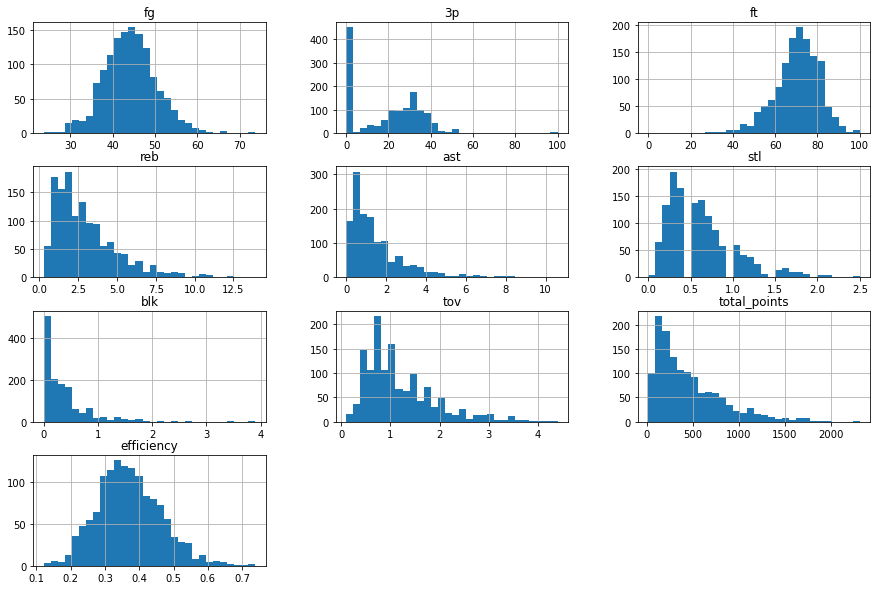

In [ ]:
X.hist(bins=30, figsize=(15, 10))

As can be seen, most of the variables are continuous and normally distributed. Even though there are some that are skewed,  the Gaussian Naive Bayes is the most appropriate.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [ ]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()


# Fit the model on your training data.

nb.fit(X_train, y_train)


# Apply your model to predict on your test data. Call this "y_pred".

y_pred = nb.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [ ]:
print('Accuracy:', '%.3f' % metrics.accuracy_score(y_test, y_pred))
print('Precision:', '%.3f' % metrics.precision_score(y_test, y_pred))
print('Recall:', '%.3f' % metrics.recall_score(y_test, y_pred))
print('F1 Score:', '%.3f' % metrics.f1_score(y_test, y_pred))

Accuracy: 0.654
Precision: 0.838
Recall: 0.548
F1 Score: 0.663


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



The accuracy shows that 65%, which means that 65% of the data points were correctly classified.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


Accuracy can be a good metric of evaluation in such a case but sometimes is not that useful. For instance, in cases where the dataset is so imbalanced, the accuracy by itself doesn't tell the full story.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


The precision is about 83%, which means that the model is quite good at predicting if the player will play longer than five years. On the other hand, the recall is 55%, which means that the model doesn't have a good performance when predicting if the player will not play more than 5 years in the NBA.

**Question:** What is the F1 score of your model, and what does this score mean?

The F1 score combines both precision and recall into a single expression, the harmonic mean. The F1 score is 66%, which suggests a pretty good predictive power of the model.

### ROC Curve

The ROC curve shows how well a model separates classes by plotting true positive rate vs. false positive rate at different thresholds. It’s useful for understanding a model’s trade-off between sensitivity and false alarms. The area under the curve (AUC) summarizes this, with higher values meaning better performance.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

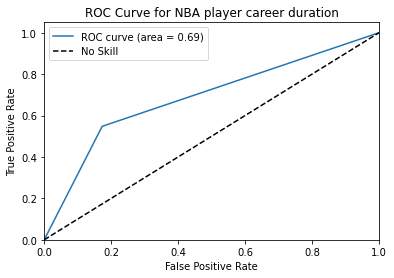

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NBA player career duration')
plt.legend()
plt.show()

As it can be seen, the model's TP/FP rate is reasonably close to the top-left corner of the plot, which suggests reasonable predictive power of the model at classifying whether an NBA player will have a career lasting at least 5 years or not.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

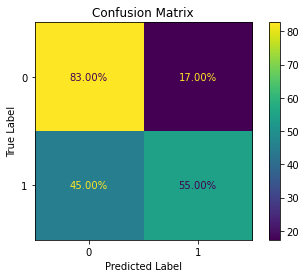

In [ ]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

import numpy as np

def conf_matrix_plot_percentage(model, x_data, y_data):
    '''
    Accepts a model object, X data (test or validate), and y data (test or validate).
    Returns a plot of the confusion matrix with percentages for predictions on y data, including the % symbol.
    '''
    # Predict the labels
    model_pred = model.predict(x_data)

    # Compute the confusion matrix
    cm = metrics.confusion_matrix(y_data, model_pred, labels=model.classes_)

    # Normalize the confusion matrix by row (to show percentages per class)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create a confusion matrix display
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_percentage,
                                  display_labels=model.classes_)

    # Plot the confusion matrix
    disp.plot()

    # Customize text to add the '%' symbol
    for i, text in enumerate(disp.text_.ravel()):
        value = float(text.get_text())
        text.set_text(f"{value:.2f}%")  # Format with percentage symbol

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Create the display for your confusion matrix.

conf_matrix_plot_percentage(nb, X_test, y_test)


# Plot the visual in-line.

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


The diagonal from the top left to the bottom right of the confusion matrix shows the correct predictions, and the ratio of these values indicates the model's accuracy. The true positives are notably higher than the false positives, which is why the precision score is strong at 0.8406. However, the true negatives and false negatives are fairly close, which explains the relatively lower recall score.

## Considerations

**How would you present your results to your team?**

Based on the results of the classification model, I would provide the following summary to the team:

* Accuracy: The model achieved an accuracy of 65.4%, meaning it correctly predicted the outcome (whether a player will last longer than 5 years in the NBA) about two-thirds of the time.

* Precision: With a precision of 83.8%, the model performs well in minimizing false positives. This means that when the model predicts a player will last more than 5 years, it is correct 83.8% of the time.

* Recall: The recall is 54.8%, indicating that the model correctly identifies 54.8% of players who will last longer than 5 years. This suggests that the model misses almost half of the players who could potentially make it.

* F1 Score: The F1 Score of 0.663 represents a balance between precision and recall. Given the context of this problem, this score shows that there is room for improvement in catching more true positives while maintaining a reasonable level of precision.

The confusion matrix reveals:

* True Negatives (83%): The model correctly predicts that 83% of players will not last more than 5 years.
* False Positives (17%): 17% of players were predicted to last longer than 5 years when they actually didn't.
* False Negatives (45%): The model incorrectly predicts that 45% of players who would last longer than 5 years won't, which shows that the model misses a significant portion of these players.
* True Positives (55%): 55% of players who were predicted to last longer than 5 years are correctly classified.


**How would you summarize your findings to stakeholders?**

The model provides valuable insights into predicting an NBA player's likelihood of playing for five years or more. It performed better at identifying players who are likely to have long careers, correctly classifying a majority of those players as true positives. This suggests that the model is effective in spotting talent with a higher chance of sustained success in the league.

However, the model was less accurate when predicting players who are unlikely to last beyond five years. It struggled more with identifying these players as true negatives, leading to some false positives. Despite this, the model still offers useful predictions for talent assessment, though there is a greater focus on recognizing long-term success.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged